# Store Analysis

# Content Table

# Introduction
This dataset contains captures of detailed transactions from a supermarket, including product categories, unit prices, quantities, and gross income. It also records customer demographics like gender, payment method, and membership type.

We are going to analyze the following points: 

* Sale trends
* Customer behavior
* Revenue performance

The process for this report will be the next:

1. Description and corrections of the data
2. Data Analysis
   1. Sale Trends
   2. Customer Behavior
   3. Revenue Performance
3. Conclusions

Having said that, we are going to begin with the project: 

# 1. Description and corrections of the data

Before continuing, let's add the description of the columns of the dataset: 



   * **Invoice ID**: A unique identifier for each transaction or purchase. This is typically a string or alphanumeric code.

   * **Branch**: Indicates the specific branch of the supermarket where the transaction took place. This could be categorical (e.g., "A", "B", "C").

   * **City**:The city where the supermarket branch is located. This is also categorical and helps in geographic analysis.

   * **Customer Type**: Defines the type of customer (e.g., "Member" or "Normal"). This could be useful for segmentation and understanding purchasing behavior.

   * **Gender**: The gender of the customer (e.g., "Male" or "Female"). This can be useful for demographic analysis.

   * **Product Line**: Specifies the category of products purchased (e.g., "Groceries", "Clothing", "Electronics"). This helps in product performance analysis.

   * **Unit Price**: The price of a single unit of the product. This is a continuous numerical value.

   * **Quantity**: The number of units purchased in a single transaction. This is also a continuous numerical value.

   * **Tax 5%**:The amount of tax applied to the purchase, calculated as 5% of the total before tax. This is a continuous numerical value.

   * **Total**: The total amount paid by the customer, including tax. This is a continuous numerical value.

   * **Date**:The date of the transaction, which can help in time series analysis. Format is typically in YYYY-MM-DD.

   * **Time**:The time of the transaction, which can be used to analyze peak shopping hours.

   * **Payment**:The method of payment used (e.g., "Cash", "Credit Card", "Debit Card"). This is categorical and provides insights into payment preferences.

   * **COGS**: Cost of Goods Sold, representing the total cost of producing the goods sold. This is a continuous numerical value.

   * **Gross Margin Percentage**: The percentage difference between sales and the cost of goods sold, indicating the profitability of sales.

   * **Gross Income**:The income remaining after deducting the cost of goods sold from total sales. This is a continuous numerical value.

   * **Rating**:The customer’s rating of the product or service, usually on a scale (e.g., 1 to 5). This can help in understanding customer satisfaction.

   

Now let's continue with the procedure. We are going to describe the data and review if there is any corrections, missing data or duplicates.

In [2]:
# Loading libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# Loading data
df = pd.read_csv("./datasets/supermarket_sales.csv")

In [4]:
# Describe the data
display(df.info())
display(df.describe())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

None

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


As we can see, the name for the columns don't follow the "snake_case" methology, some columns (`Date` and `Time`) don't match the appropriate data type, we can confirm that there is no missing data. Also we are going to corroborate if there is any duplicated data: 

In [5]:
# Checking for duplicated data: 
display(df[df.duplicated()])

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


We do not have duplicated information in the dataset, so we can continue with the corrections:

## Columns name change:

In [6]:
# Creating an array to store the new columns names: 
new_col_names = []

# Creating a for loop to change the names for the columns
for old_name in df.columns:
    # Stripping the names of the old columns:
    name_stripped = old_name.strip()
    # Lowering the old columns names: 
    name_lowered = name_stripped.lower()
    # Changing spaces for "_":
    name_no_spaces = name_lowered.replace(" ", "_")
    # adding the new name to the array:
    new_col_names.append(name_no_spaces)
    
# Changing the old names for the new ones:
df.columns = new_col_names

df.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## Changing data types

In [7]:
# Changing data type for the column "date":
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

# Changing data type for the column "time":
df['time'] = pd.to_datetime(df['time'], format='%H:%M')

# Corroborating the changes: 
print(df.info())
df[['date','time']].head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_id               1000 non-null   object        
 1   branch                   1000 non-null   object        
 2   city                     1000 non-null   object        
 3   customer_type            1000 non-null   object        
 4   gender                   1000 non-null   object        
 5   product_line             1000 non-null   object        
 6   unit_price               1000 non-null   float64       
 7   quantity                 1000 non-null   int64         
 8   tax_5%                   1000 non-null   float64       
 9   total                    1000 non-null   float64       
 10  date                     1000 non-null   datetime64[ns]
 11  time                     1000 non-null   datetime64[ns]
 12  payment                  1000 non-n

,date,time
0,2019-01-05,1900-01-01 13:08:00
1,2019-03-08,1900-01-01 10:29:00
2,2019-03-03,1900-01-01 13:23:00
3,2019-01-27,1900-01-01 20:33:00
4,2019-02-08,1900-01-01 10:37:00


As we can see the column `time` also have a date, so we are going to divide the information in two new integer columns `hours` and `minutes`:

In [8]:
# Creating the new columns: 

# hour
df['hour'] = df['time'].dt.hour

# minutes
df['minutes'] = df['time'].dt.minute

df.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating,hour,minutes
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1900-01-01 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,13,8
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,1900-01-01 10:29:00,Cash,76.40,4.761905,3.8200,9.6,10,29
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1900-01-01 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,13,23
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,1900-01-01 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,20,33
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,1900-01-01 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,10,37


Now we can drop the column `time`:

In [9]:
# Deleting the column "time"
df = df.drop('time', axis=1)

df.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,payment,cogs,gross_margin_percentage,gross_income,rating,hour,minutes
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,Ewallet,522.83,4.761905,26.1415,9.1,13,8
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,Cash,76.40,4.761905,3.8200,9.6,10,29
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,Credit card,324.31,4.761905,16.2155,7.4,13,23
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,Ewallet,465.76,4.761905,23.2880,8.4,20,33
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,Ewallet,604.17,4.761905,30.2085,5.3,10,37


All the changes are done, so we can continue with the exploration of the data.

# Data Analysis

## Sale Trends

In this section we are going to detect distinct trends in the sales of the store, so let's begin with witch product_line the customers buy the most: 

In [10]:
# Obtaining the product with more sales
product_trend = df.groupby('product_line', as_index=False).agg({'invoice_id': 'count'}).sort_values('invoice_id', ascending=False)

product_trend

,product_line,invoice_id
1,Fashion accessories,178
2,Food and beverages,174
0,Electronic accessories,170
5,Sports and travel,166
4,Home and lifestyle,160
3,Health and beauty,152


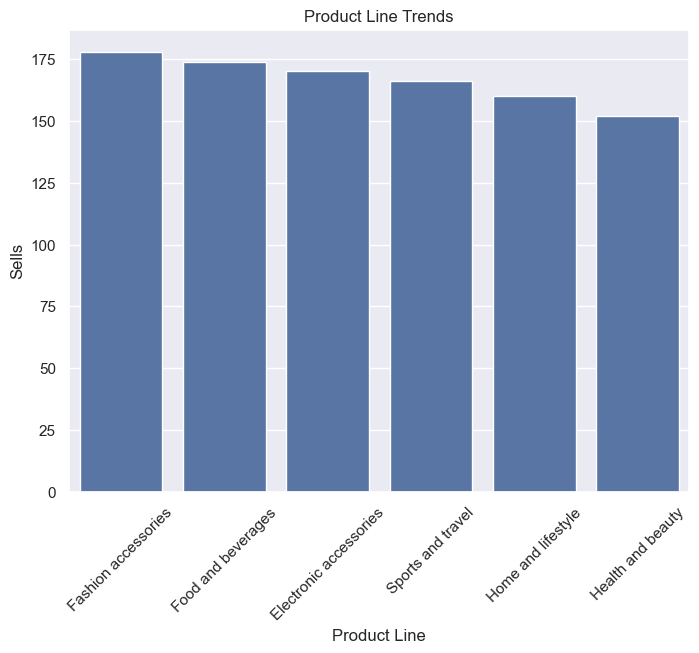

In [11]:
# Creating the data chart of products trends
plt.figure(figsize=(8,6))
sns.set_theme()
sns.barplot(x='product_line', y='invoice_id', data=product_trend)
plt.title('Product Line Trends')
plt.xlabel('Product Line')
plt.ylabel('Sells')
plt.xticks(rotation = 45)
plt.show()


As we can see, the product line that has more sales is `Fashion Accessories`. Let's review the trending products of each store branch.

In [12]:
# Grouping by branch, product line and sales
branch_product_trend = df.groupby(['branch','product_line'], as_index=False).agg({'invoice_id': 'count'}).sort_values(by=['branch','invoice_id'], ascending=[True, False])

branch_product_trend

,branch,product_line,invoice_id
4,A,Home and lifestyle,65
0,A,Electronic accessories,60
5,A,Sports and travel,59
2,A,Food and beverages,58
1,A,Fashion accessories,51
3,A,Health and beauty,47
7,B,Fashion accessories,62
11,B,Sports and travel,62
6,B,Electronic accessories,55
9,B,Health and beauty,53


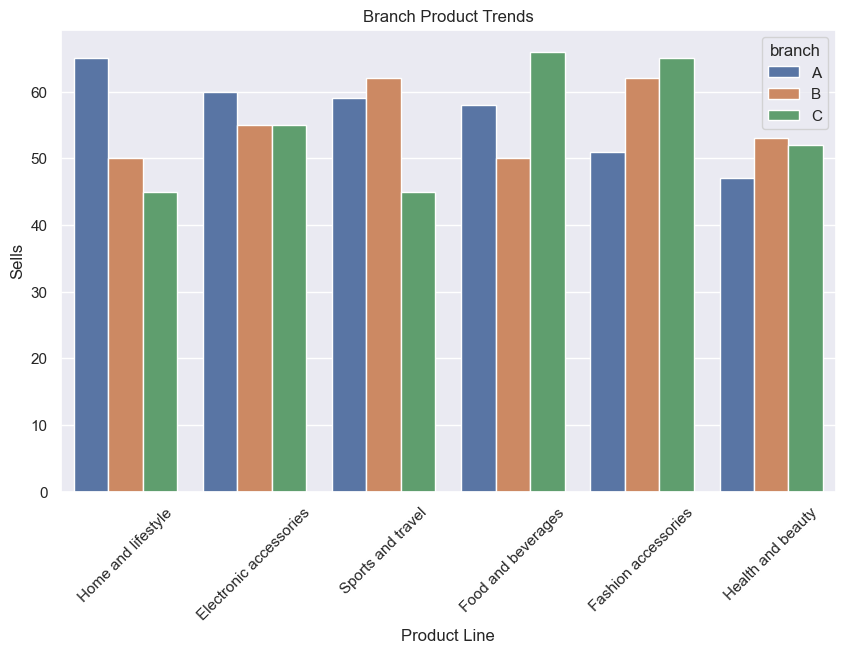

In [13]:
# Creating the data chart of branch products trends
plt.figure(figsize=(10,6))
sns.set_theme()
sns.barplot(x='product_line', y='invoice_id', hue='branch', data=branch_product_trend)
plt.title('Branch Product Trends')
plt.xlabel('Product Line')
plt.ylabel('Sells')
plt.xticks(rotation = 45)
plt.show()

According with these results, we can have the following conclusion:

* The most popular Product Line of the store is `Fashion Accessories`

For each store branch these are the most popular Product Line: 

* Store A: `Home and Lifestyle` and `Electronic Accessories`
* Store B: `Sports and Travel` and `Fashion Accessories`
* Store C: `Food and Beverages` and `Fashion Accessories`


## Customer Behavior

In this section we are going to review the behavior of the customers.

first of all, let's review the different kind of customers that the store have: 

* Customer Gender
* Customer Type


In [89]:
# Grouping per customer gender:
customer_gender = df.groupby('gender', as_index=False).agg({'invoice_id': 'count'})

customer_gender

,gender,invoice_id
0,Female,501
1,Male,499


In [91]:
# Grouping per customer type and gender:
customer_type_gender = df.groupby(['gender', 'customer_type'], as_index=False).agg({'invoice_id': 'count'})

customer_type_gender

,gender,customer_type,invoice_id
0,Female,Member,261
1,Female,Normal,240
2,Male,Member,240
3,Male,Normal,259


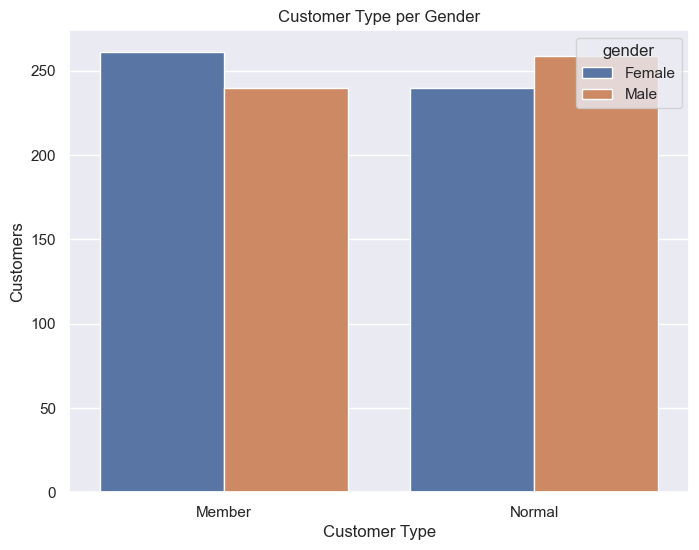

In [92]:
plt.figure(figsize=(8,6))
sns.set_theme()
sns.barplot(data=customer_type_gender, x='customer_type', y='invoice_id', hue='gender')
plt.title("Customer Type per Gender")
plt.xlabel("Customer Type")
plt.ylabel("Customers")
plt.show()


As we can see, there are basically the same amount of customer of each gender (Male and Female), but we can see that the Female customer are more common of being a Member of the store, and the Male customers are more common of not being Members, just for a little deference.

Now let's see which products prefers each customer type and gender. 

In [108]:
# Grouping per customer gender and product_line
product_line_per_gender = df.groupby(['gender','product_line'], as_index=False).agg({'quantity': 'sum'}).sort_values(by='quantity', ascending=False)

product_line_per_gender

,gender,product_line,quantity
1,Female,Fashion accessories,530
2,Female,Food and beverages,514
9,Male,Health and beauty,511
4,Female,Home and lifestyle,498
5,Female,Sports and travel,496
0,Female,Electronic accessories,488
6,Male,Electronic accessories,483
8,Male,Food and beverages,438
11,Male,Sports and travel,424
10,Male,Home and lifestyle,413


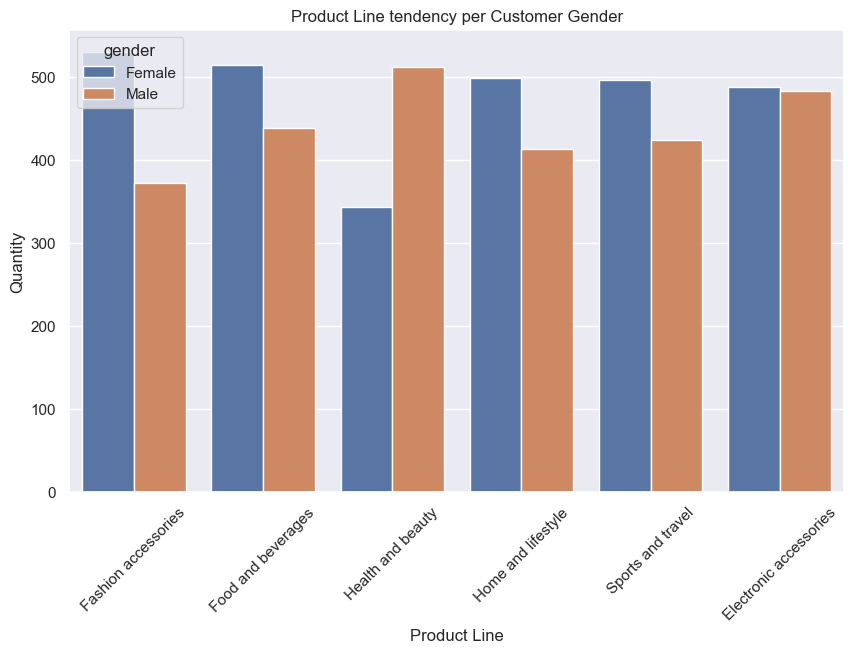

In [109]:
# Creating of the chart of the results of customer gender and product line
plt.figure(figsize=(10,6))
sns.set_theme()
sns.barplot(data=product_line_per_gender, x='product_line', y='quantity', hue='gender')
plt.title("Product Line tendency per Customer Gender")
plt.xlabel("Product Line")
plt.ylabel("Quantity")
plt.xticks(rotation = 45)
plt.show()

In [110]:
# Grouping per customer type and product_line
product_line_per_customer_type = df.groupby(['customer_type','product_line'], as_index=False).agg({'quantity': 'sum'}).sort_values(by='quantity', ascending=False)

product_line_per_customer_type

,customer_type,product_line,quantity
6,Normal,Electronic accessories,542
2,Member,Food and beverages,506
5,Member,Sports and travel,493
4,Member,Home and lifestyle,490
7,Normal,Fashion accessories,463
8,Normal,Food and beverages,446
1,Member,Fashion accessories,439
0,Member,Electronic accessories,429
3,Member,Health and beauty,428
11,Normal,Sports and travel,427


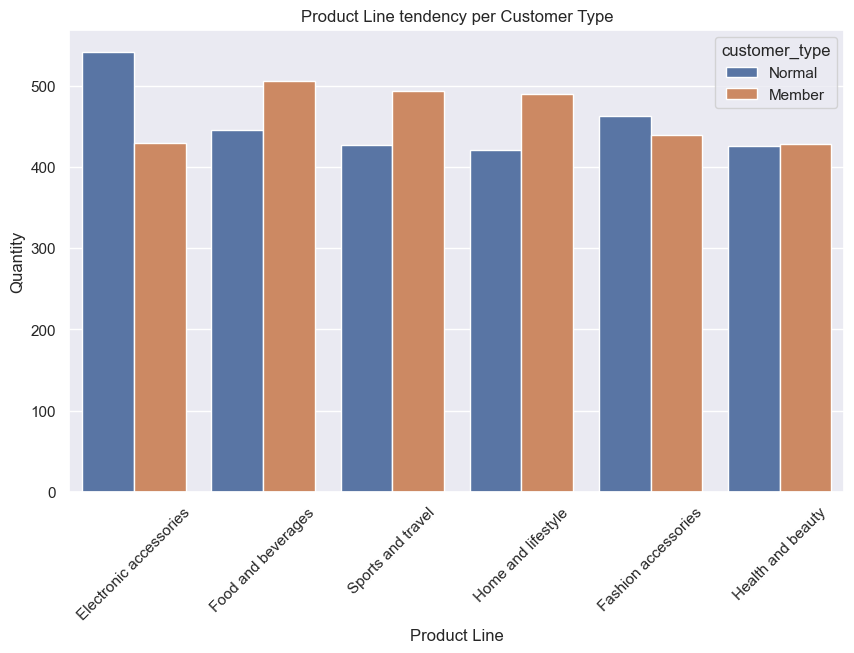

In [112]:
# Creating of the chart of the results of customer gender and product line
plt.figure(figsize=(10,6))
sns.set_theme()
sns.barplot(data=product_line_per_customer_type, x='product_line', y='quantity', hue='customer_type')
plt.title("Product Line tendency per Customer Type")
plt.xlabel("Product Line")
plt.ylabel("Quantity")
plt.xticks(rotation = 45)
plt.show()

According with this results we can conclude the following: 
* Female Customers are more used to be a Member of the store
* Female Customers are more used to buy `Fashion Accessories` and `Food And Beverages` products
* Male Customers are more used to be Normal users of the store
* Male Customers are more used to buy `Health and Beauty` and `Electronic Accessories` products
* Normal Customers are more used to buy `Electronic Accessories` products.
* Member Customers are more used to buy `Food and Beverages`, `Sport and Travel` and `Home and Lifestyle` products

Now let's review the period of time of the dataset:

In [14]:
# Reviewing the period of time of the dataset
print(f"The period of time of the dataset is from {df['date'].min()} to {df['date'].max()}" )

The period of time of the dataset is from 2019-01-01 00:00:00 to 2019-03-30 00:00:00


As we can see, the dataset is for 3 moths, thats enough time to review the behavior of the clients per date, day and month. So the first thing that we are going to do is to group by day and per gender.

In [82]:
# Creating a new column for day of the month and month
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month

df.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,payment,cogs,gross_margin_percentage,gross_income,rating,hour,minutes,day,month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,Ewallet,522.83,4.761905,26.1415,9.1,13,8,5,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,Cash,76.40,4.761905,3.8200,9.6,10,29,8,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,Credit card,324.31,4.761905,16.2155,7.4,13,23,3,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,Ewallet,465.76,4.761905,23.2880,8.4,20,33,27,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,Ewallet,604.17,4.761905,30.2085,5.3,10,37,8,2


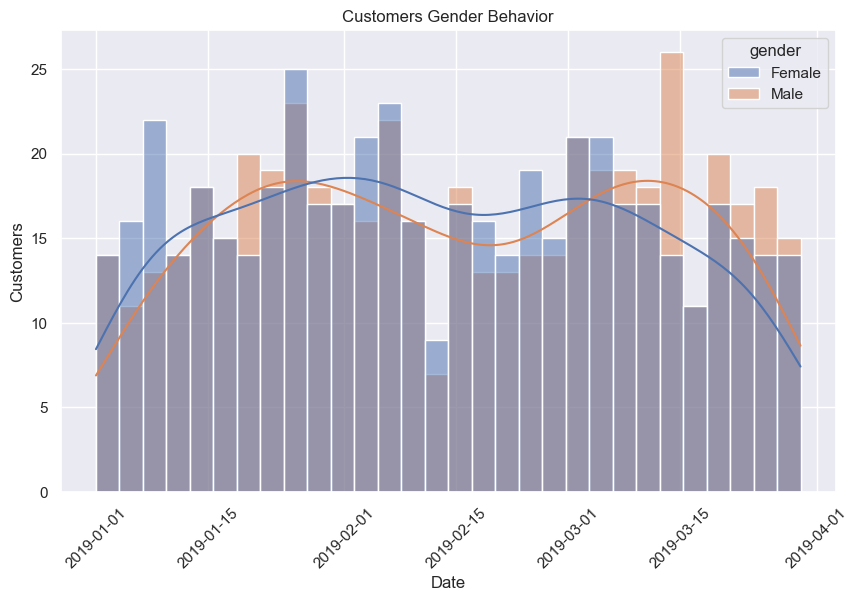

In [115]:
# Creating of the chart of the behavior per date
plt.figure(figsize=(10,6))
sns.set_theme()
sns.histplot(data=df, x='date', hue='gender',bins=30, kde=True)
plt.title('Customers Gender Behavior')
plt.xlabel('Date')
plt.ylabel('Customers')
plt.xticks(rotation = 45)
plt.show()

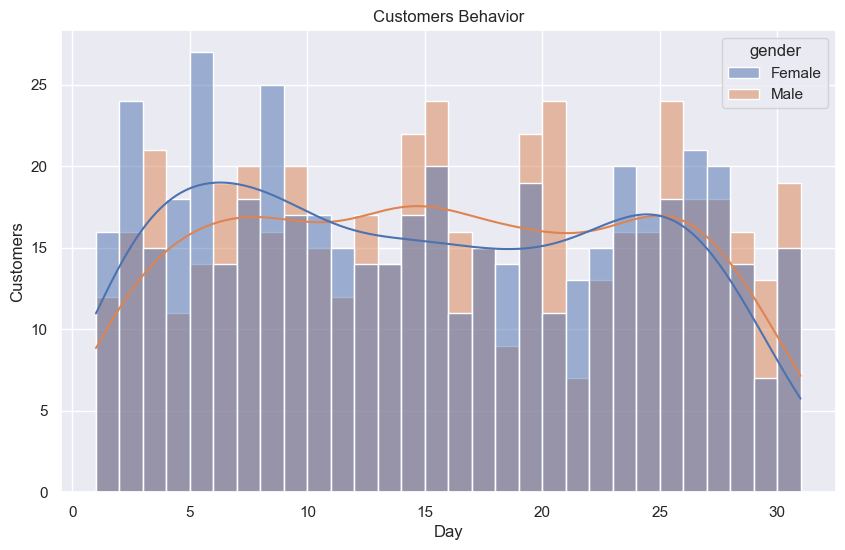

In [116]:
# Creating of the chart of the behavior
plt.figure(figsize=(10,6))
sns.set_theme()
sns.histplot(data=df, x='day', hue='gender',bins=30, kde=True)
plt.title('Customers Behavior')
plt.xlabel('Day')
plt.ylabel('Customers')
plt.show()

In [83]:
# Grouping per month and per gender
customer_per_date = df.groupby(['month', 'gender'], as_index=False).agg({'invoice_id': 'count'}).sort_values(by='month', ascending=False)

customer_per_date.head(10)

,month,gender,invoice_id
4,3,Female,161
5,3,Male,184
2,2,Female,164
3,2,Male,139
0,1,Female,176
1,1,Male,176


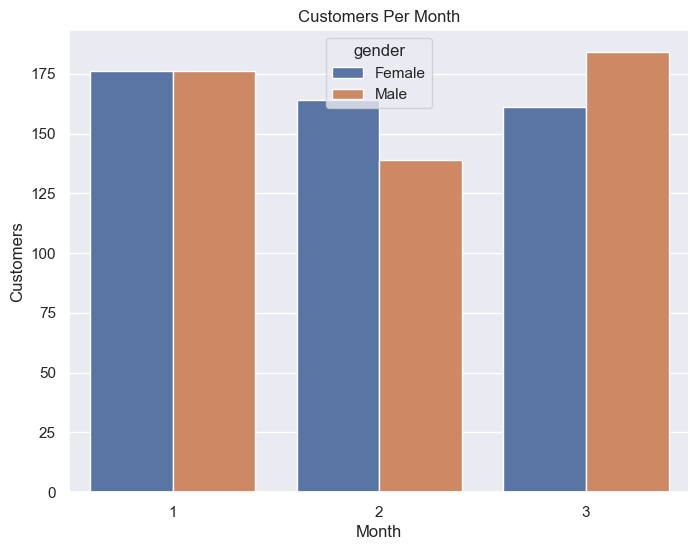

In [84]:
# Creating of the chart of the behavior per month
plt.figure(figsize=(8,6))
sns.set_theme()
sns.barplot(data=customer_per_date, x='month', y='invoice_id', hue='gender')
plt.title("Customers Per Month")
plt.xlabel('Month')
plt.ylabel("Customers")
plt.show()

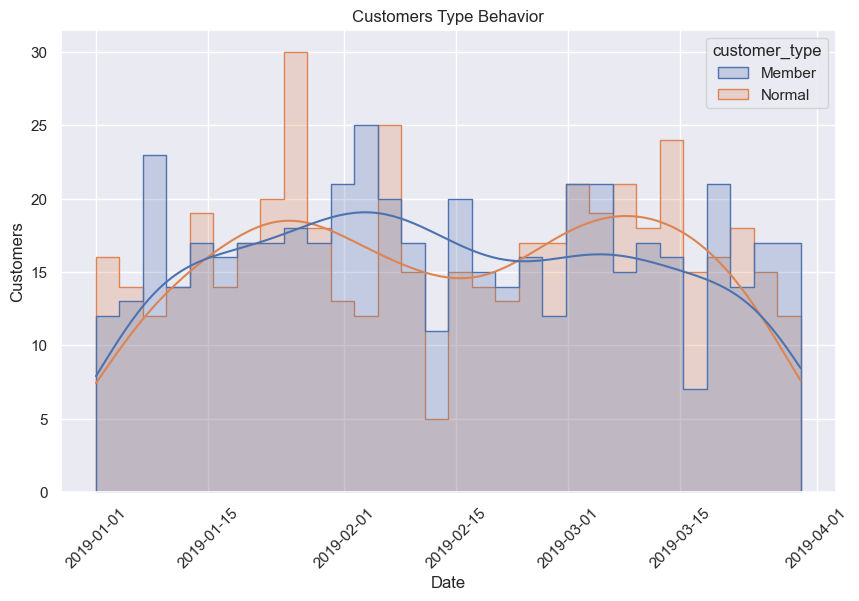

In [87]:
# Creating of the chart of the behavior per date
plt.figure(figsize=(10,6))
sns.set_theme()
sns.histplot(data=df, x='date', hue='customer_type',bins=30, kde=True, element='step')
plt.title('Customers Type Behavior')
plt.xlabel('Date')
plt.ylabel('Customers')
plt.xticks(rotation = 45)
plt.show()

In [88]:
# Grouping per customer type and month
customer_type_date = df.groupby(['month', 'customer_type'], as_index=False).agg({'invoice_id': 'count'}).sort_values(by='month', ascending=False)

customer_type_date

,month,customer_type,invoice_id
4,3,Member,166
5,3,Normal,179
2,2,Member,163
3,2,Normal,140
0,1,Member,172
1,1,Normal,180


As we can see in this charts, the female customers 

Parece ser que los clientes mujeres 

In [86]:
print(df['city'].unique())
print(df.branch.unique())

['Yangon' 'Naypyitaw' 'Mandalay']
['A' 'C' 'B']


# Revenue Performance

In [18]:
# Grouping by product line and obtaining the revenue
product_revenue = df.groupby('product_line', as_index=False).agg({'gross_income':'sum'}).sort_values(by='gross_income', ascending=False)

product_revenue.head()

,product_line,gross_income
2,Food and beverages,2673.5640
5,Sports and travel,2624.8965
0,Electronic accessories,2587.5015
1,Fashion accessories,2585.9950
4,Home and lifestyle,2564.8530


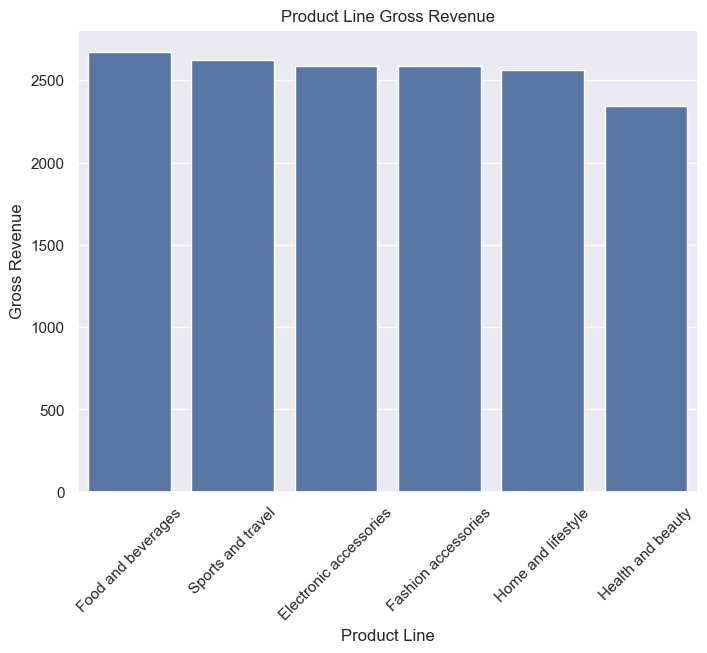

In [19]:
# Creating the data chart of Product Line Gross Income
plt.figure(figsize=(8,6))
sns.set_theme()
sns.barplot(x='product_line', y='gross_income', data=product_revenue)
plt.title('Product Line Gross Revenue')
plt.xlabel('Product Line')
plt.ylabel('Gross Revenue')
plt.xticks(rotation = 45)
plt.show()